### The Central Limit Theorem - the law of large numbers

![Copy Right](https://miro.medium.com/v2/resize:fit:2560/format:webp/1*N1g9hUN9t6BjaXSqVKwbEQ.png)
 
©️ https://miro.medium.com/v2/resize:fit:2560/format:webp/1*N1g9hUN9t6BjaXSqVKwbEQ.png

* What is a the central limit theorem?

It refers to the fact that for a large number $N$ a series of sampled random variables (e.g. the means of a set of samples) tends to form a normal distribution irrespective of the original distribution the data comes from.

* How does it apply to (any) distribution?

To answer this you are encouraged to inspect the probability distributions below. You can play with the slider to see the transition within each distribution depending on the number of means computed. It affects all of them!


* Where does it apply in the real world/what usage can be made?

This is perhaps the most useful question. Go through the notebook to find out.



Text(0.5, 1.0, 'Sample size: 10000')

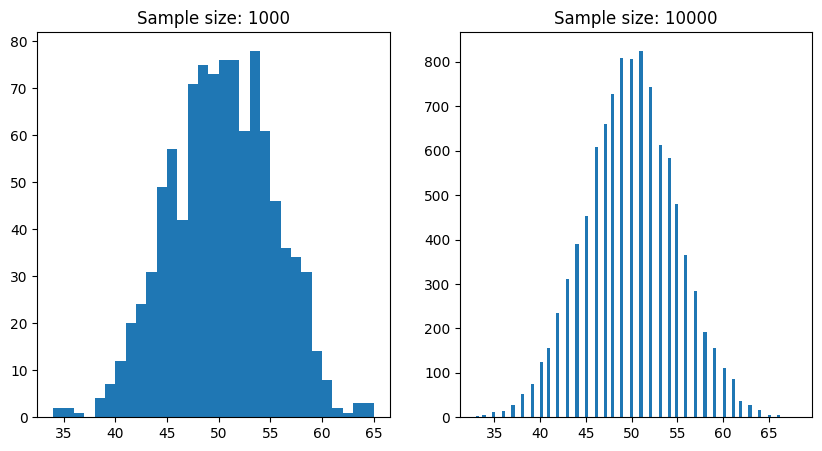

In [1]:
# Binominal

# The idea is simple: compute a series of means and look how they are distributed. 
# Binomial distribution is a good candidate for this task. It models a coin toss with n trials and p probability of success as either 0 or 1.
# The mean of a binomial distribution is n*p.


import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# n trials with p probability organized in m sequences
n, p, m = 100, 0.5, 1000
draw = np.random.binomial(n, p, m)
axs[0].hist(draw, bins=max(10, int(np.sqrt(m))));
axs[0].set_title("Sample size: 1000")

n, p, m = 100, 0.5, 10000
draw = np.random.binomial(n, p, m)
axs[1].hist(draw, bins=max(10, int(np.sqrt(m))));
axs[1].set_title("Sample size: 10000")

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, IntSlider, widgets
from IPython.display import display
from scipy import stats


def draw_calc_mean(nsequences, func, means_sampled=30, bins=None, overlay_normal=True, **kwargs):
    plt.figure(figsize=(10, 6))

    # Generate nsequences samples, each of size means_sampled
    draw = func(size=(nsequences, means_sampled), **kwargs)

    # Calculate mean for each sample
    randomvars = np.mean(draw, axis=1)

    # Calculate mean and standard deviation of the sample means
    sample_mean = np.mean(randomvars)
    sample_std = np.std(randomvars)

    # Determine number of bins if not specified
    if bins is None:
        bins = max(10, nsequences // 100)

    # Plot histogram
    n, bins, patches = plt.hist(
        randomvars, bins=bins, density=True, edgecolor='black', alpha=0.7)

    # Overlay normal distribution if requested
    if overlay_normal:
        x = np.linspace(min(randomvars), max(randomvars), 100)
        plt.plot(x, stats.norm.pdf(x, sample_mean, sample_std), 'r-', lw=2,
                 label=f'Normal: μ={sample_mean:.2f}, σ={sample_std:.2f}')
        plt.legend()

    plt.title(
        f'Mean of {func.__name__} Distribution\n{nsequences} samples, each of size {means_sampled}')
    plt.xlabel('Sample Mean')
    plt.ylabel('Density')
    plt.grid(True, alpha=0.3)
    plt.show()


def interactive_dist(func, min_samples=10, max_samples=10000, min_bins=10, max_bins=100, **kwargs):
    def update(nsequences, bins, overlay_normal):
        draw_calc_mean(nsequences, func, bins=bins,
                       overlay_normal=overlay_normal, **kwargs)

    samples_slider = IntSlider(
        min=min_samples, max=max_samples, step=10, value=min_samples, description='Samples:')
    bins_slider = IntSlider(min=min_bins, max=max_bins,
                            step=5, value=min_bins, description='Bins:')
    overlay_checkbox = widgets.Checkbox(
        value=True, description='Overlay Normal')

    return interactive(update, nsequences=samples_slider, bins=bins_slider, overlay_normal=overlay_checkbox)


# Example usage:
# Binomial distribution
binomial_widget = interactive_dist(np.random.binomial, n=100, p=0.2)
display(binomial_widget)

# Normal distribution
normal_widget = interactive_dist(np.random.normal, loc=0, scale=1)
display(normal_widget)

# Poisson distribution
poisson_widget = interactive_dist(np.random.poisson, lam=3)
display(poisson_widget)

# Exponential distribution
exponential_widget = interactive_dist(np.random.exponential, scale=1)
display(exponential_widget)

# Uniform distribution
uniform_widget = interactive_dist(np.random.uniform, low=0, high=1)
display(uniform_widget)

# Gamma distribution
gamma_widget = interactive_dist(np.random.gamma, shape=2, scale=1)
display(gamma_widget)

interactive(children=(IntSlider(value=10, description='Samples:', max=10000, min=10, step=10), IntSlider(value…

interactive(children=(IntSlider(value=10, description='Samples:', max=10000, min=10, step=10), IntSlider(value…

interactive(children=(IntSlider(value=10, description='Samples:', max=10000, min=10, step=10), IntSlider(value…

interactive(children=(IntSlider(value=10, description='Samples:', max=10000, min=10, step=10), IntSlider(value…

interactive(children=(IntSlider(value=10, description='Samples:', max=10000, min=10, step=10), IntSlider(value…

interactive(children=(IntSlider(value=10, description='Samples:', max=10000, min=10, step=10), IntSlider(value…

In [4]:
import random
import ipywidgets as widgets
from IPython.display import display


def roll_die(sides=6):
    return random.randint(1, sides)


def simulate_rolls(sides, num_rolls):
    results = [roll_die(sides) for _ in range(num_rolls)]
    mean_value = sum(results) / num_rolls if num_rolls > 0 else 0
    expected_value = np.mean(range(1, sides+1))
    results_text = ', '.join(map(str, results))
    return f"Roll results: {results_text}<br>Mean value: {mean_value:.2f} <br>Expected value: {expected_value:1f}"


def update_results(change):
    sides = sides_slider.value
    num_rolls = rolls_slider.value
    results_output.value = simulate_rolls(sides, num_rolls)


# Create sliders for sides and number of rolls
sides_slider = widgets.IntSlider(
    value=6, min=2, max=100, step=1, description='Sides:')
rolls_slider = widgets.IntSlider(
    value=1, min=1, max=100, step=1, description='Rolls:')

# Create output widget for displaying results
results_output = widgets.HTML()

# Attach the update function to the sliders
sides_slider.observe(update_results, names='value')
rolls_slider.observe(update_results, names='value')

# Display the widgets
display(widgets.VBox([sides_slider, rolls_slider, results_output]))

# Initial display of results
update_results(None)

In [6]:
import pandas as pd

df = pd.read_excel('../data/01 Call-Center-Dataset.xlsx')
df2 = pd.read_csv('../data/Call Center Data.csv')
df3 = pd.read_excel(
    '../data/Telecom Company Call-Center-Dataset.xlsx')


def check_consistency(df1, df2):
    """
    Check if two DataFrames have the same columns in the same order.

    :param df1: First DataFrame to compare
    :param df2: Second DataFrame to compare
    :return: True if both DataFrames have the same columns in the same order, False otherwise
    """
    # Check if the number of columns matches
    if len(df1.columns) != len(df2.columns):
        return False

    # Check if all columns match in order and names
    return all(df1.columns == df2.columns)

to_check = [df, df2, df3]

# Check consistency between all pairs of DataFrames
for i in range(len(to_check)):
    for j in range(i + 1, len(to_check)):
        print(
            f"Checking consistency between DataFrame {i+1} and DataFrame {j+1}")
        result = check_consistency(to_check[i], to_check[j])
        print(f"Result: {result}")

Checking consistency between DataFrame 1 and DataFrame 2
Result: False
Checking consistency between DataFrame 1 and DataFrame 3
Result: True
Checking consistency between DataFrame 2 and DataFrame 3
Result: False


In [7]:
df_combined = pd.concat([df, df3])


In [8]:
# Drop rows with missing values in the 'AvgTalkDuration' column
df_avg_time = df_combined['AvgTalkDuration'].dropna()

In [9]:
import datetime

# Function to convert timedate information to time in numbers
def convert_time(time_str):
    time_str = time_str.split(':')
    return datetime.timedelta(hours=int(time_str[0]), minutes=int(time_str[1]), seconds=int(time_str[2]))

# Store seconds
sec_list = []

for i, index in enumerate(df_avg_time.values):
    # Extract the time from the string in seconds 
    sec_list.append(convert_time(str(df_avg_time.values[i])).seconds)
    

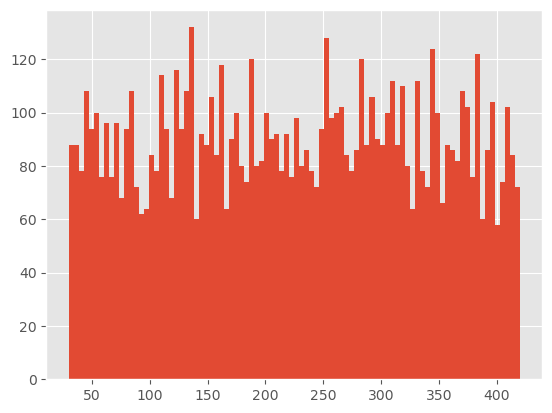

In [12]:
# Ignore this
plt.style.use('ggplot')
plt.hist(sec_list, bins=max(10, int(np.sqrt(len(sec_list)))));
plt.show()

CPU times: user 2 μs, sys: 0 ns, total: 2 μs
Wall time: 5.01 μs
Estimated Population Mean: 225.09


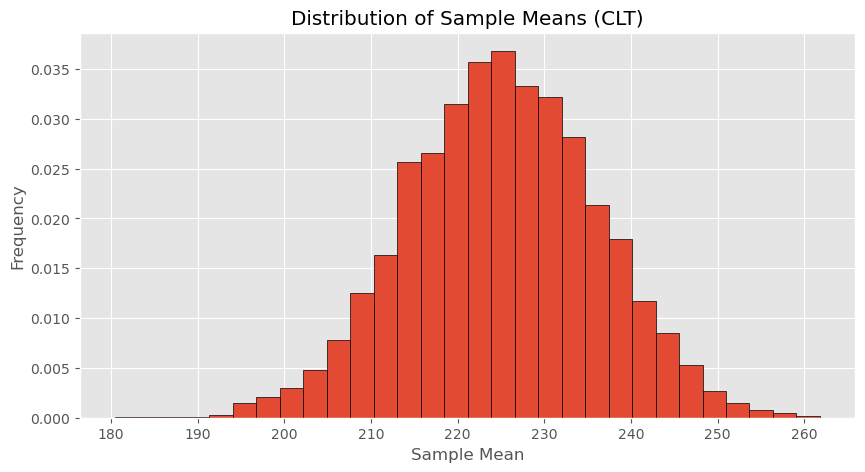

In [11]:
%time

import numpy as np
import matplotlib.pyplot as plt
from numba import jit, njit
import warnings
warnings.filterwarnings("ignore")

# Convert list to numpy array for numba compatibility

@jit(nopython=True)
def monte_carlo_clt(nsamples, ntrials, population):
    """
    Perform Monte Carlo simulation to demonstrate the Central Limit Theorem.
    
    :param nsamples: Number of samples to draw per trial
    :param ntrials: Number of trials to perform
    :param population: The population array to sample from
    :return: Array of sample means
    """
    sample_means = np.zeros(ntrials)
    population = np.array(population)

    # Perform Monte Carlo trials
    for i in range(ntrials):
        # Draw a sample from the population
        sample = np.random.choice(a=population, size=nsamples, replace=True)
        # Calculate the mean of the sample
        sample_mean = np.mean(sample)
        # Store the sample mean
        sample_means[i] = sample_mean

    return sample_means


def plot_sample_means(sample_means):
    # Plot the distribution of sample means
    plt.figure(figsize=(10, 5))
    plt.hist(sample_means, bins=30, edgecolor='black', density=True)
    plt.title('Distribution of Sample Means (CLT)')
    plt.xlabel('Sample Mean')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


# Example usage with 1000 samples per trial and 1000 trials
n_samples = 100
n_trials = 10000
sample_means = monte_carlo_clt(n_samples, n_trials, sec_list)

# Calculate the mean of the sample means to estimate the population mean
estimated_mean = np.mean(sample_means)
print(f"Estimated Population Mean: {estimated_mean:.2f}")

# Plot the sample means
plot_sample_means(sample_means)

This tell us the expected value of the time spend in phone conversations is around 224.92 seconds or 3.748 minutes.

How do we this value is accurate? We don't. But relying on the central limit theorem for large N (here $N \geq 10000$ gives us a reasonable estimate, i.e. the mean value from a gaussian.)
